## Ordinal additive MNIST (OA-MNIST)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import gzip
import pickle

In [3]:
dat = pickle.load(gzip.open("../../../data/mnist.pkl.gz"))

In [4]:
train_data, valid_data, test_data = dat

In [5]:
X_train, y_train = train_data
X_train = X_train.reshape((X_train.shape[0], 1, 28, 28))
X_valid, y_valid = valid_data
X_valid = X_valid.reshape((X_valid.shape[0], 1, 28, 28))
X_test, y_test = test_data
X_test = X_test.reshape((X_test.shape[0], 1, 28, 28))

In [6]:
X_train.dtype

dtype('float32')

In [140]:
def create_digit(X_frame, y_frame, num_to_sample):
    """
    X_frame:
    y_frame:
    returns: the composite digit, and the number of unique
      digits it has
    """
    #np.random.seed(0)
    sz = 96
    blank = np.zeros((sz,sz))
    digit_list = []
    for iter_ in range(num_to_sample):
        rnd_idx = np.random.randint(0, X_frame.shape[0])
        dg, cls = X_frame[rnd_idx][0], y_frame[rnd_idx]
        digit_list.append(cls)
        rand_x = np.random.randint(0, sz-28)
        rand_y = np.random.randint(0, sz-28)
        blank[rand_y:rand_y+28,rand_x:rand_x+28] += dg
    np.clip(blank, 0, 1)
    return blank, len(set(digit_list))-1

num unique: 2


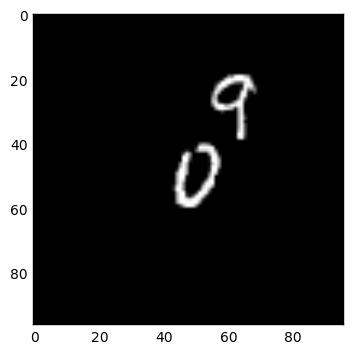

In [128]:
plt.imshow(create_digit(X_train, y_train, num_to_sample=2),cmap="gray")

In [141]:
def create_dataset():
    np.random.seed(0)
    # create a new dataset which is the same
    # size as the original mnist dataset
    results = []
    for X_frame, y_frame in [(X_train, y_train),(X_valid,y_valid),(X_test,y_valid)]:
        X_frame_new = np.zeros((X_frame.shape[0], 1, 96, 96))
        y_frame_new = np.zeros((X_frame.shape[0],))
        for e in range(X_frame.shape[0]):
            num_to_sample = np.random.randint(1, 5+1)
            img, cls = create_digit(X_frame, y_frame, num_to_sample=num_to_sample)
            X_frame_new[e][0] = img
            y_frame_new[e] = cls
        results.append(X_frame_new)
        results.append(y_frame_new)
    return results

In [142]:
new_dataset = create_dataset()

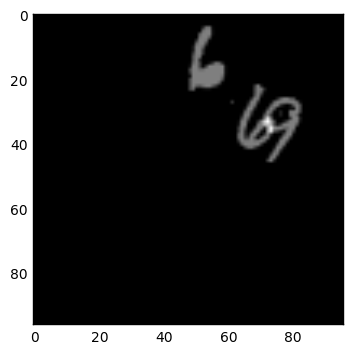

In [143]:
plt.imshow(new_dataset[0][-2][0],cmap="gray")

In [138]:
from collections import Counter

In [148]:
Counter(new_dataset[5])

Counter({0.0: 2272, 1.0: 2433, 2.0: 2696, 3.0: 1963, 4.0: 636})

In [149]:
import h5py
f = h5py.File("/tmp/mnist.ord.a.h5", "w")
f.create_dataset('xt', shape=new_dataset[0].shape, dtype=new_dataset[0].dtype)
f['xt'][:] = new_dataset[0]
f.create_dataset('yt', shape=new_dataset[1].shape, dtype=new_dataset[1].dtype)
f['yt'][:] = new_dataset[1]
f.create_dataset('xv', shape=new_dataset[2].shape, dtype=new_dataset[2].dtype)
f['xv'][:] = new_dataset[2]
f.create_dataset('yv', shape=new_dataset[3].shape, dtype=new_dataset[3].dtype)
f['yv'][:] = new_dataset[3]
f.create_dataset('xtest', shape=new_dataset[4].shape, dtype=new_dataset[4].dtype)
f['xtest'][:] = new_dataset[4]
f.create_dataset('ytest', shape=new_dataset[5].shape, dtype=new_dataset[5].dtype)
f['ytest'][:] = new_dataset[5]
f.close()

In [151]:
%%bash
rm /tmp/mnist.ord.a.h5